In [1]:
import numpy as np
import pandas as pd
import cv2                 
import numpy as np         
import os                  
from random import shuffle
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob as gb
from tensorflow.keras.utils import to_categorical

In [2]:
TrianImage="/Users/darshvaidya/projects/covid_detection/Dataset/train"
TestImage="/Users/darshvaidya/projects/covid_detection/Dataset/test"
Pneumonaimages = os.listdir(TrianImage + "/PNEUMONIA")
Normalimages = os.listdir(TrianImage + "/NORMAL")
COVID19images = os.listdir(TrianImage + "/COVID19")

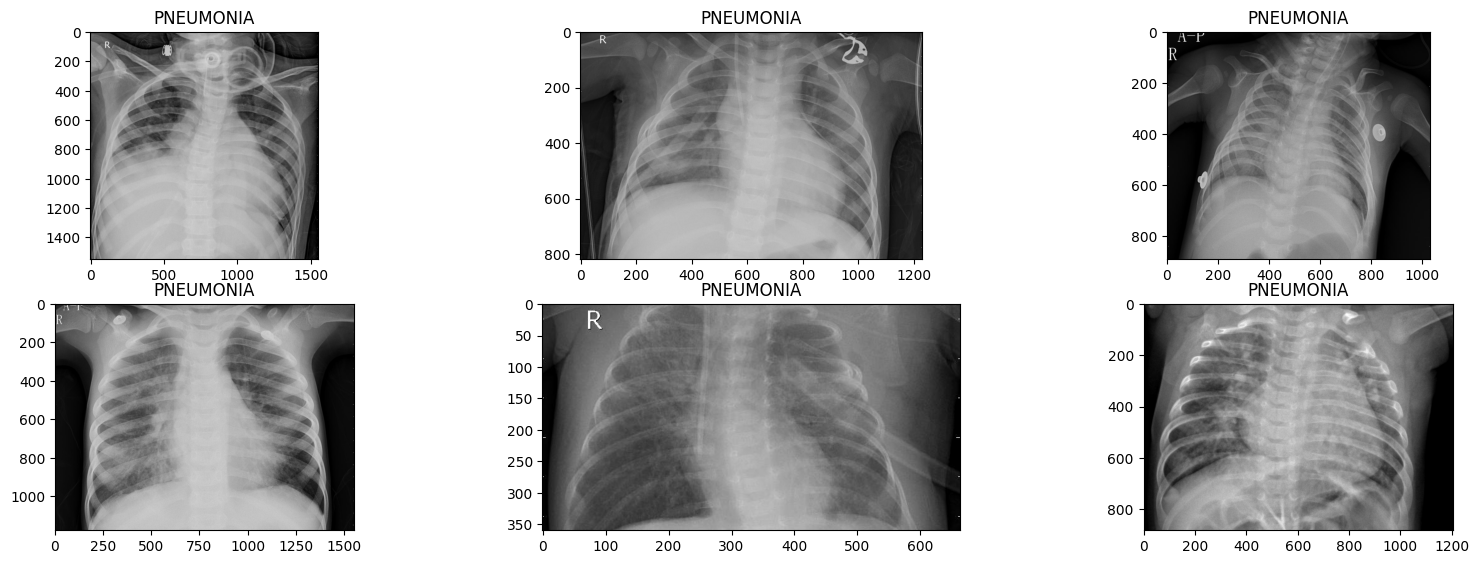

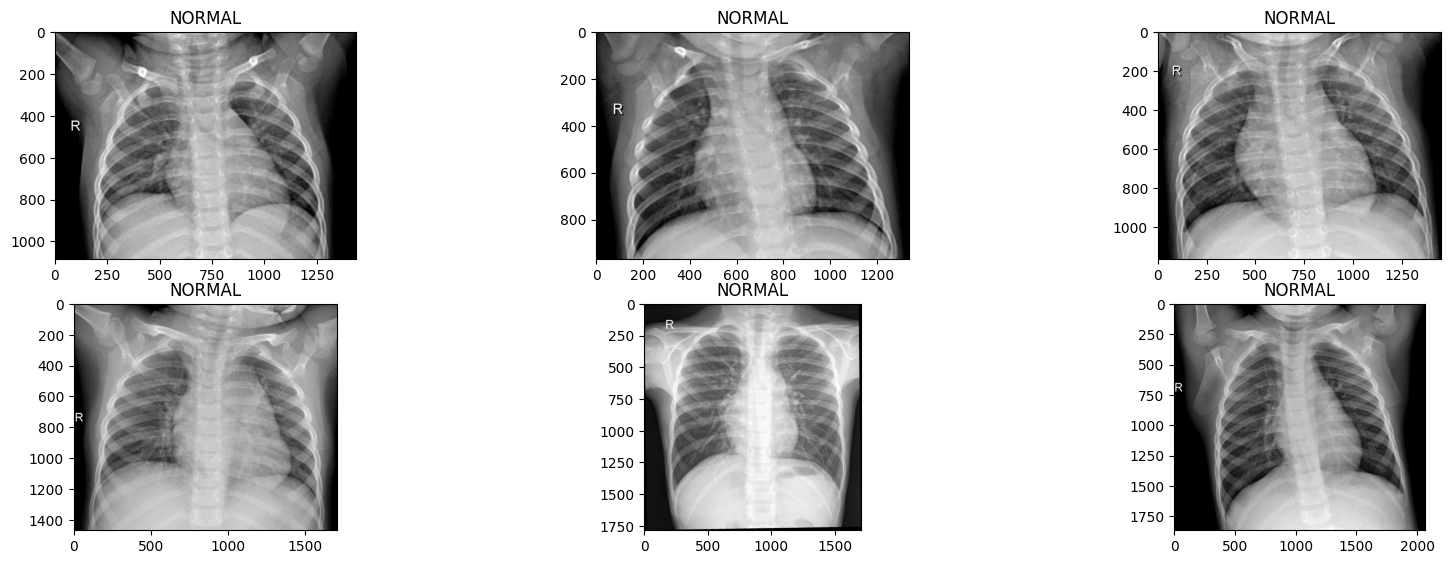

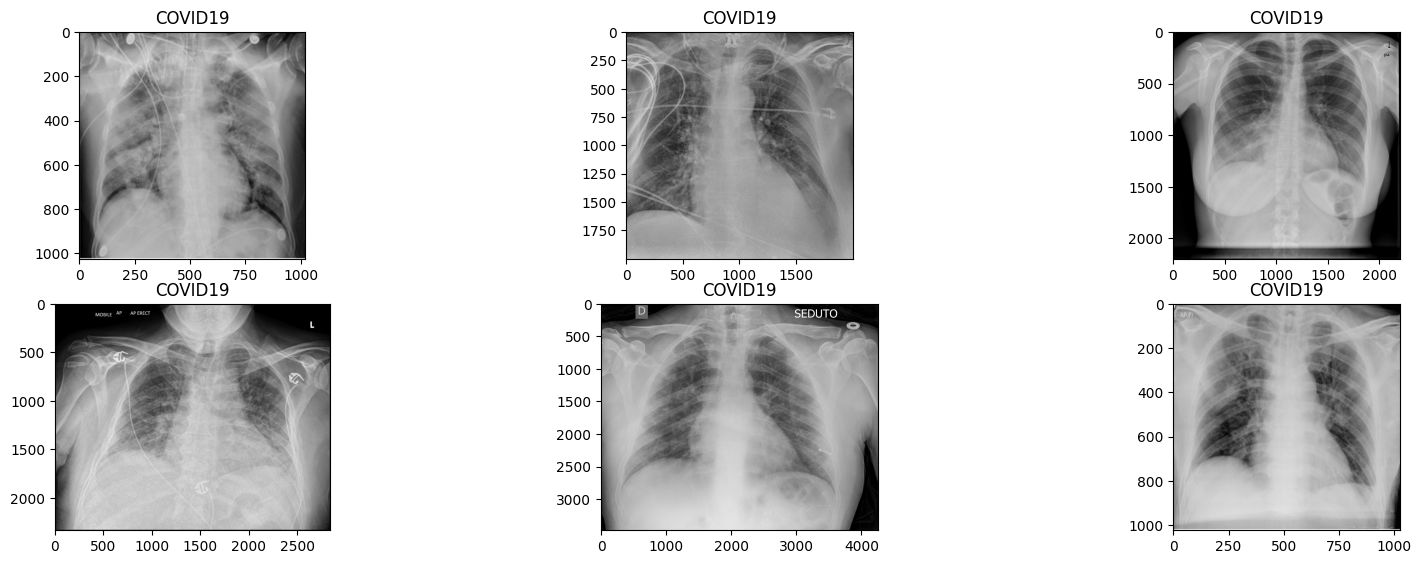

In [3]:
#plot to show the size of some image
#plot PNEUMONIA
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(TrianImage + "/PNEUMONIA",Pneumonaimages[i])),cmap='gray')
    plt.title("PNEUMONIA")
    
plt.show()
#plot NORMAL
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(TrianImage + "/NORMAL",Normalimages[i])),cmap='gray')
    plt.title("NORMAL")

plt.show()
#plot COVID-19
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(TrianImage + "/COVID19",COVID19images[i])),cmap='gray')
    plt.title("COVID19")

In [4]:
train_datagen = ImageDataGenerator(
      samplewise_center=True,
      samplewise_std_normalization= True,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest'
                                  )

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE 
# TRAIN GENERATOR.
train_generator =train_datagen.flow_from_directory(
     TrianImage,
     batch_size= 256,
     shuffle=shuffle,
     target_size=(300, 300)

)

test_generator =train_datagen.flow_from_directory(
     TestImage,
     batch_size= 50,
     shuffle=shuffle,
     target_size=(300, 300)

)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [5]:
trainShape=train_generator.__getitem__(0)[0].shape
testShape=test_generator.__getitem__(0)[0].shape
print("Train Shape \n",trainShape)
print("Test Shape \n",testShape)

Train Shape 
 (256, 300, 300, 3)
Test Shape 
 (50, 300, 300, 3)


In [6]:


Labels={'NORMAL':0,'PNEUMONIA':1,'COVID19':2}

# convert label to code
def getCode(label):
    return Labels[label]


# convert code to label 
def getLabel(n):
    for x,c in Labels.items():
        if n==c:
            return x
        
        
        
#Test        
print(getCode('COVID19'))
print(getLabel(2))

2
COVID19


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


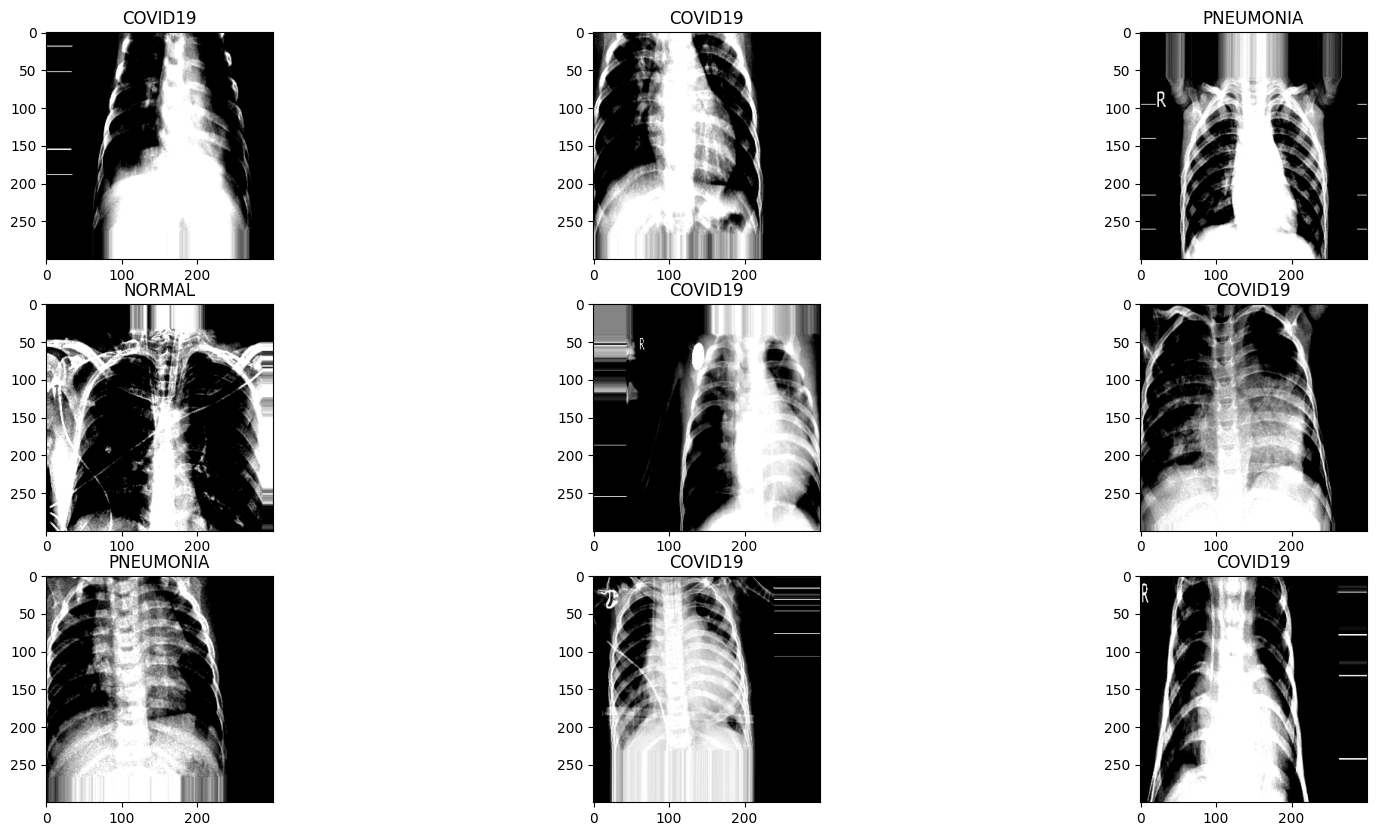

In [7]:
plt.figure(figsize=(20,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_generator.__getitem__(0)[0][i])
    plt.title(getLabel(np.argmax(train_generator.__getitem__(0)[1][i])) )

In [8]:
#Reading image data
import glob as gb
import cv2  
sizeImage=300 # to resize the all image as same size

#to read all images from directory
def getData(Dir,sizeImage):
    X=[]
    y=[]
    for folder in  os.listdir(Dir) : #to get the file name 
        files = gb.glob(pathname= str( Dir  +"/" +folder+ '//*.jpg' )) # to get the images
        for file in files:
                picture=cv2.imread(file) #  or plt.imread(file)
                imageArray=cv2.resize(picture,(sizeImage,sizeImage))
                X.append(list(imageArray))
                y.append(getCode(folder))
    X=np.array(X)
    y=np.array(y)
    return X,y

In [9]:
#get train data
X_train, y_train = getData(TrianImage,sizeImage)
# get test data
X_test , y_test = getData(TestImage,sizeImage)

print("X_train Shape        ",X_train.shape)
print("X_test Shape         ",X_test.shape)

X_train Shape         (5144, 300, 300, 3)
X_test Shape          (1288, 300, 300, 3)


In [10]:
# #Convert y_train to categorical
y_train=to_categorical(y_train,3)
print("y_train ",y_train.shape)



#Convert y_train to categorical
y_test=to_categorical(y_test,3)
print("y_test ",y_test.shape)

y_train  (5144, 3)
y_test  (1288, 3)


In [11]:
Network_Weight="../densenet-keras/DenseNet-BC-169-32-no-top.h5"
print(Network_Weight)

../densenet-keras/DenseNet-BC-169-32-no-top.h5


In [12]:
from tensorflow.keras.applications.densenet import DenseNet169
pre_trained_model = DenseNet169(input_shape = (sizeImage, sizeImage, 3), 
                                include_top = False, 
                                weights = None)
pre_trained_model.load_weights(Network_Weight)
for layer in pre_trained_model.layers:
    layer.trainable = False  #to make the layers to Freeze Weights
pre_trained_model.summary()

Model: "densenet169"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 300, 300, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 306, 306, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 150, 150, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 150, 150, 64)         256       ['conv1/conv[0][0]']

In [13]:
from tensorflow.keras import Model


x = tf.keras.layers.Flatten()(pre_trained_model.output)

#Full Connected Layers
x = tf.keras.layers.Dense(512, activation='relu')(x)
#Add dropout to avoid Overfit
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
#Add dropout to avoid Overfit
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)


x=tf.keras.layers.Dense(3 , activation='sigmoid')(x)
       

model = Model( pre_trained_model.input, x) 

print(model.summary())
model.compile(optimizer='adam', loss="binary_crossentropy",metrics=['accuracy'])


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 300, 300, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 306, 306, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 150, 150, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 150, 150, 64)         256       ['conv1/conv[0][0]']      

In [14]:
from tensorflow.keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

filepath="transferlearning_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [15]:
epochs = 30
history = model.fit_generator(train_generator,steps_per_epoch=20,callbacks=[lr_reduce,checkpoint] ,
         epochs=epochs)

/var/folders/zc/07rznxxs2wx74jgvfv6m7nn00000gn/T/ipykernel_13462/344087038.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=20,callbacks=[lr_reduce,checkpoint] ,


Epoch 1/30
20/20 [==============================] - 233s 11s/step - loss: 2.8942 - accuracy: 0.6399 - lr: 0.0010
Epoch 2/30
20/20 [==============================] - 236s 12s/step - loss: 0.4396 - accuracy: 0.8349 - lr: 0.0010
Epoch 3/30
20/20 [==============================] - 222s 11s/step - loss: 0.2563 - accuracy: 0.8748 - lr: 0.0010
Epoch 4/30
20/20 [==============================] - 224s 11s/step - loss: 0.2001 - accuracy: 0.8975 - lr: 0.0010
Epoch 5/30
20/20 [==============================] - 222s 11s/step - loss: 0.1669 - accuracy: 0.9133 - lr: 0.0010
Epoch 6/30
20/20 [==============================] - 222s 11s/step - loss: 0.1488 - accuracy: 0.9241 - lr: 0.0010
Epoch 7/30
20/20 [==============================] - 227s 11s/step - loss: 0.1497 - accuracy: 0.9288 - lr: 0.0010
Epoch 8/30
20/20 [==============================] - 225s 11s/step - loss: 0.1332 - accuracy: 0.9325 - lr: 0.0010
Epoch 9/30
20/20 [==============================] - 225s 11s/step - loss: 0.1219 - accuracy: 0.9

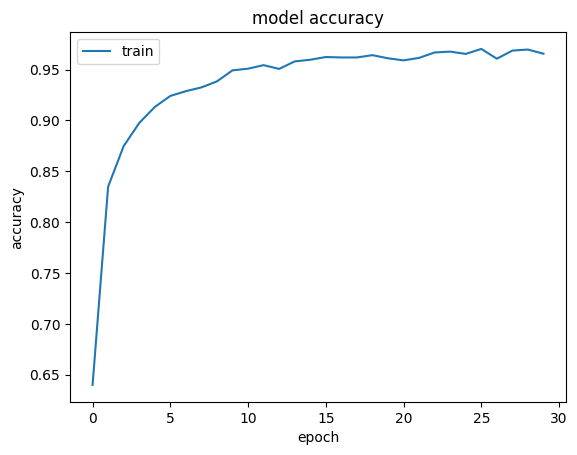

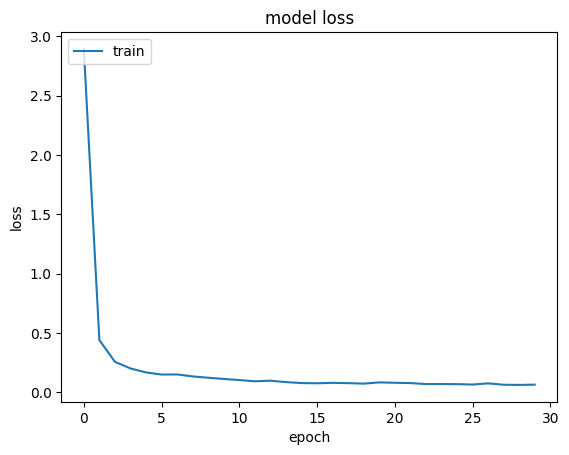

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [17]:
#Evaluate Model
model.evaluate(test_generator)

26/26 [==============================] - 63s 2s/step - loss: 0.0753 - accuracy: 0.9565


[0.07532349973917007, 0.95652174949646]

In [30]:
model.save('modelCovid19___1.h5')

In [19]:
pred=model.predict(test_generator)

26/26 [==============================] - 64s 2s/step


In [20]:
print(len(pred))

1288


In [21]:
y_test=[]
for i in range(26):
    y_test.extend(test_generator.__getitem__(i)[1])

In [22]:
print(len(y_test))
y_test=np.array(y_test)

1288


In [23]:
y_test=np.argmax(y_test,axis=1)
pred= np.argmax(pred,axis=1)

In [24]:
print("pred \n",len(pred))
print("y_test \n",len(y_test))

pred 
 1288
y_test 
 1288


In [25]:
print("y_test \n",y_test)
print("pred \n",pred)

y_test 
 [1 2 2 ... 2 2 2]
pred 
 [2 1 2 ... 2 2 2]


In [26]:
#confusion_matrix to check in accuracy 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred,y_test)
print(cm)

[[ 10  26  83]
 [ 31  87 216]
 [ 75 204 556]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


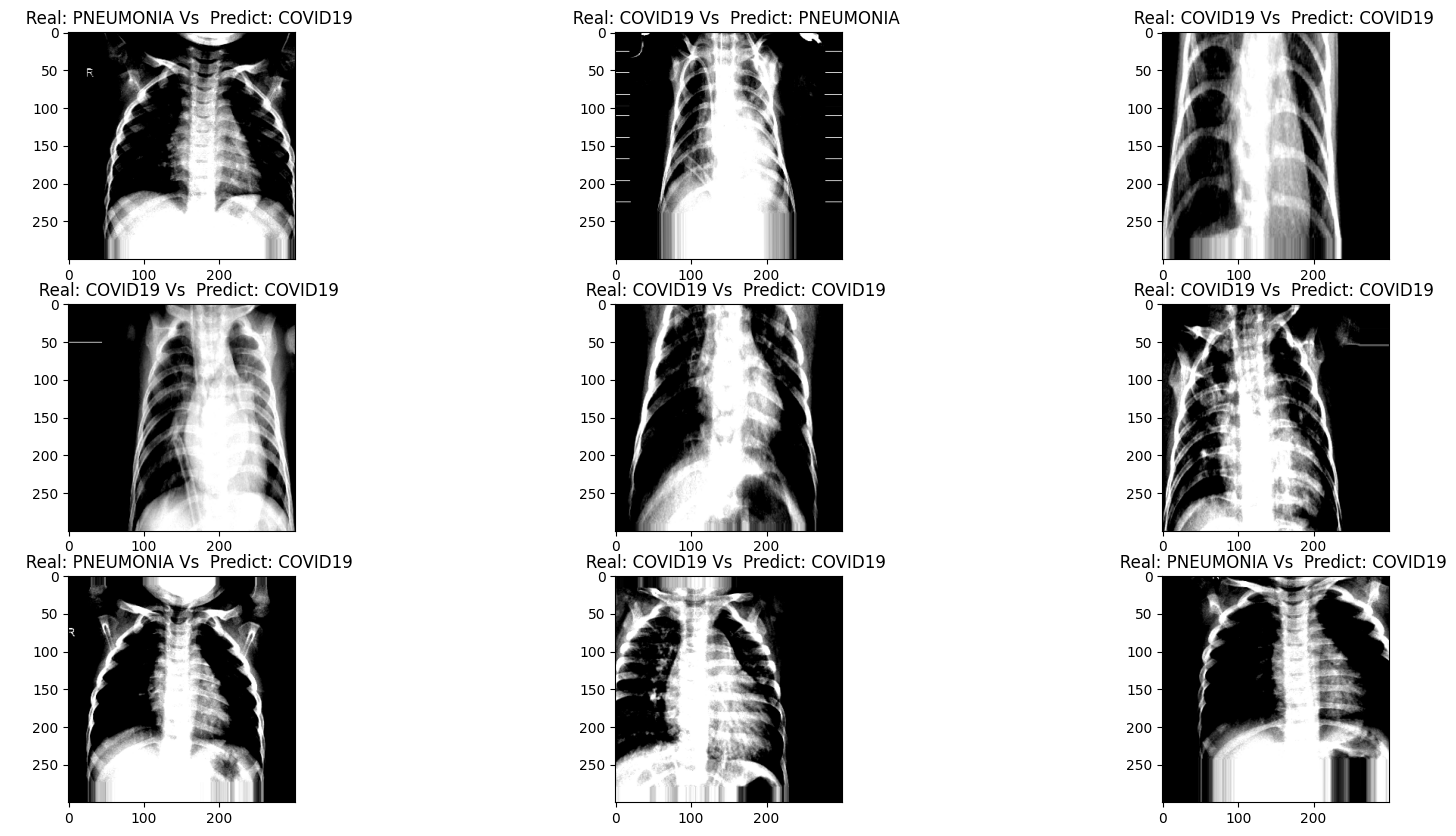

In [27]:
plt.figure(figsize=(20,10))
for i in range(0,9):
    
    plt.subplot(3, 3, i + 1)
    
    plt.imshow(test_generator.__getitem__(0)[0][i],cmap='gray')
    plt.title(f"   Real: {getLabel(y_test[i])   } Vs  Predict: {getLabel(pred[i])}")

In [33]:
#lto load model
from keras.models import load_model
loadedModel=load_model("modelCovid19___1.h5")

In [34]:
loadedModel.compile(optimizer='adam', loss="binary_crossentropy",metrics=['accuracy'])
loadedModel.evaluate(test_generator)

26/26 [==============================] - 78s 3s/step - loss: 0.0681 - accuracy: 0.9604


[0.06813229620456696, 0.9604037404060364]

In [36]:
# Example for saving a Keras model in TensorFlow SavedModel format
model.save("modelCovid19___1", save_format='tf')


INFO:tensorflow:Assets written to: modelCovid19___1/assets


INFO:tensorflow:Assets written to: modelCovid19___1/assets
